In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%tensorflow_version 2.x

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import lite
import cv2

In [ ]:
dataset_path = '/content/gdrive/My Drive/TuLeHi/Voice Data'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['stop', 'tree', 'visual', 'yes', 'zero', 'three', 'two', 'up', 'wow', 'right', 'no', 'seven', 'six', 'off', 'sheila', 'on', 'marvin', 'one', 'nine', 'happy', 'forward', 'go', 'house', 'eight', 'follow', 'four', 'learn', 'left', 'five', 'bed', 'down', 'dog', 'bird', 'cat', 'backward']


In [ ]:
feature_sets_path = '/content/gdrive/My Drive/TuLeHi'
feature_sets_filename = 'trimmed_targets_mfcc_sets.npz'
model_filename = '/content/gdrive/My Drive/TuLeHi/wake_word_stop_model.h5'
word_filename = '/content/gdrive/My Drive/TuLeHi/stop.jpg'
wake_word = 'stop'

In [ ]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [ ]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print([*y_val])

(4476, 16, 16)
(550, 16, 16)
(561, 16, 16)
[17.0, 11.0, 11.0, 11.0, 12.0, 11.0, 19.0, 11.0, 11.0, 11.0, 14.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 0.0, 7.0, 2.0, 4.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 1.0, 15.0, 11.0, 11.0, 11.0, 19.0, 11.0, 19.0, 11.0, 11.0, 1.0, 11.0, 14.0, 11.0, 11.0, 0.0, 11.0, 11.0, 11.0, 11.0, 14.0, 14.0, 19.0, 11.0, 11.0, 11.0, 11.0, 18.0, 5.0, 3.0, 11.0, 11.0, 11.0, 11.0, 11.0, 15.0, 11.0, 11.0, 19.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 14.0, 4.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 15.0, 19.0, 1.0, 19.0, 11.0, 11.0, 14.0, 18.0, 11.0, 11.0, 4.0, 11.0, 14.0, 11.0, 11.0, 11.0, 14.0, 0.0, 11.0, 11.0, 18.0, 18.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 15.0, 11.0, 4.0, 11.0, 11.0, 15.0, 11.0, 11.0, 0.0, 11.0, 10.0, 11.0, 16.0, 11.0, 11.0, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 19.0, 5.0, 19.0, 11.0, 11.0, 11.0, 14.0, 11.0, 11.0, 11.0, 15.0, 11.0, 17.0, 5.0, 11.0, 11.0, 15.0, 11.0, 11.0, 13.0, 5.0, 11.0, 11.0, 11.0, 11.0, 19

In [ ]:
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [ ]:
print(y_val)
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(x_train.shape)

(4476, 16, 16)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(4476, 16, 16, 1)
(550, 16, 16, 1)
(561, 16, 16, 1)


In [ ]:
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [ ]:
model.compile( loss = "binary_crossentropy", 
               optimizer = 'rmsprop', 
               metrics=['acc']
             )

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=3, 
                    validation_data=(x_val, y_val))

Epoch 1/30
1492/1492 [==============================] - 7s 4ms/step - loss: 0.1009 - acc: 0.9915 - val_loss: 0.0551 - val_acc: 0.9873
Epoch 2/30
1492/1492 [==============================] - 7s 5ms/step - loss: 0.0974 - acc: 0.9924 - val_loss: 0.2289 - val_acc: 0.9891
Epoch 3/30
1492/1492 [==============================] - 7s 5ms/step - loss: 0.0776 - acc: 0.9931 - val_loss: 0.1635 - val_acc: 0.9891
Epoch 4/30
1492/1492 [==============================] - 7s 5ms/step - loss: 0.1041 - acc: 0.9926 - val_loss: 0.4398 - val_acc: 0.9891
Epoch 5/30
1492/1492 [==============================] - 7s 4ms/step - loss: 0.1471 - acc: 0.9929 - val_loss: 0.4603 - val_acc: 0.9891
Epoch 6/30
1492/1492 [==============================] - 7s 5ms/step - loss: 0.1341 - acc: 0.9929 - val_loss: 0.0757 - val_acc: 0.9891
Epoch 7/30
1492/1492 [==============================] - 7s 5ms/step - loss: 0.1045 - acc: 0.9929 - val_loss: 0.0898 - val_acc: 0.9891
Epoch 8/30
1492/1492 [==============================] - 7s 5ms

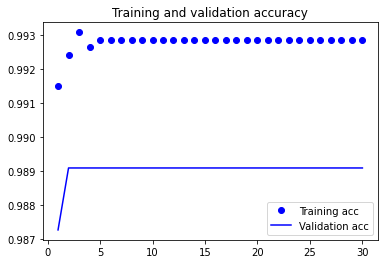

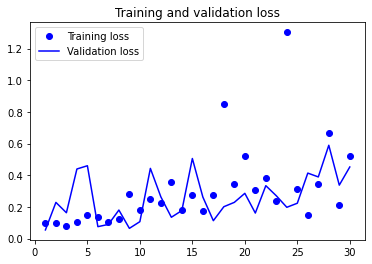

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
models.save_model(model, filepath=model_filename, save_format='.h5')

In [ ]:
i = 0;
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)
        i += 1
print(i)

5
139
434
525
4


In [ ]:
model = models.load_model(model_filename)
for i in range(1, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

NameError: ignored

In [ ]:
model.evaluate(x = x_test, y = y_test)

In [ ]:
my_test = (cv2.imread(word_filename))*(1/255)
my_test = my_test.reshape(3, 
                          my_test.shape[0], 
                          my_test.shape[1], 
                          1)
print(my_test[0])
print(my_test.shape)
print('Answer: 1  Prediction:', model.predict(np.expand_dims(my_test[0], 0)))

In [ ]:
print('Answer: 1  Prediction:', model.predict(np.expand_dims(x_test[42], 0)))

In [ ]:
import os
from os import path
for root, dirs, files in os.walk('/content/gdrive'):
    for name in files:
        if name == model_filename:
            print (path.abspath(os.path.join(root, name)))

In [ ]:
model_filename = '/content/gdrive/My Drive/TuLeHi/wake_word_stop_model.h5'
tflite_filename = '/content/gdrive/My Drive/TuLeHi/wake_word_stop_lite.tflite'

In [ ]:
model = models.load_model(model_filename)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(tflite_filename, 'wb').write(tflite_model)

In [ ]:
from tensorflow import lite
from tensorflow.keras import models
import tensorflow as tf
import tflearn

import speech_data

In [ ]:
learning_rate = 0.0001
training_iters = 300000  # steps
batch_size = 64

width = 20  # mfcc features
height = 80  # (max) length of utterance
classes = 10  # digits

batch = word_batch = speech_data.mfcc_batch_generator(batch_size)

In [ ]:
net = tflearn.input_data([None, width, height])
net = tflearn.lstm(net, 128*4, dropout=0.5)
net = tflearn.fully_connected(net, classes, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=learning_rate, loss='categorical_crossentropy')
model = tflearn.DNN(net, tensorboard_verbose=0)

In [ ]:
for x in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES): tf.add_to_collection(tf.GraphKeys.VARIABLES, x )

In [ ]:
while --training_iters > 0:
	trainX, trainY = next(batch)
	testX, testY = next(batch)  # todo: proper ;)
	model.fit(trainX, trainY, n_epoch=10, validation_set=(testX, testY), show_metric=True, batch_size=batch_size)

model.save("tflearn.lstm.model")
_y = model.predict(next(batch)[0])  # << add your own voice here
print (_y)